# <font color = 'blue'><b>Polynomial Regression</b></font>

In [1]:
# Polynomial regression
# polynomial regression is a form of regression analysis in which the relationship between the independent variable x 
# and the dependent variable y is modelled as an nth degree polynomial in x.

In [4]:
# Polynomial regression is applied when the data is non-linear.
# Suppose we have a dataset where variable X represents the Independent data and y is the dependent data. 
# Before feeding data to a model, we convert the input variables into polynomial terms using some degree. 
# The degree of the polynomial is the number of terms in the equation. For example, the equation for a 
# polynomial regression model with a degree of 3 would be:

# the polynomial regression equation is given by:
# y = b0 + b1*x + b2*x^2 + b3*x^3 + ... + bn*x^n

# for a polynomial regression model with a degree of 3:
# y = b0 + b1*x + b2*x^2 + b3*x^3


# The simpel way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# this is the class to transform the input data into polynomial data
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Generate some non-linear data
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # ax^2 + bx + c

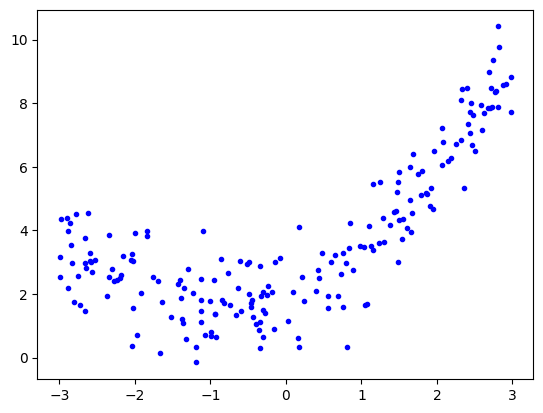

In [7]:
plt.plot(X, y, "b.")

You can see that the data is not linear, we cant predict where to put the linear regression line. so we will be using polynomial regression in this case

In [8]:
# Creating 2nd degree polynomial features

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.74946946])

In [9]:
X_poly[0]

array([0.74946946, 0.56170447])

In [10]:
# the X_poly contains the original feature of X + the square of this feature

In [13]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=2)

In [14]:
# Fitting a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.intercept_, model.coef_

(array([1.96711726]), array([[0.91038133, 0.51771168]]))

In [16]:
y_pred = model.predict(X_test)

In [17]:
# Chceking accuracy
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mae}")
print(f"R2 Score: {r2}")

Mean squared error: 1.0188738114592786
R2 Score: 0.788907671923139


# <font color = 'skyblue'><b>Testing on new Data</b></font>

In [26]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

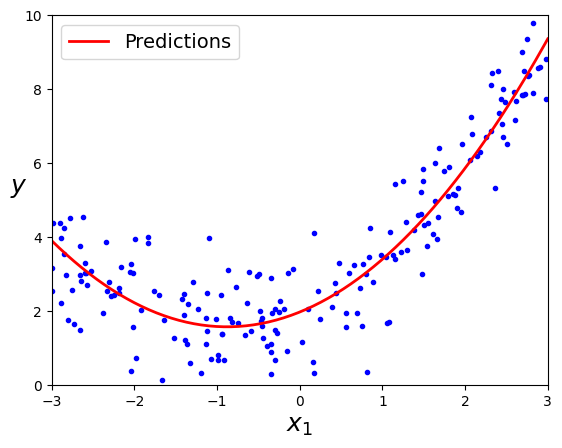

In [27]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()